# Assessing and Mitigating  Credit Default Risk at Kalar
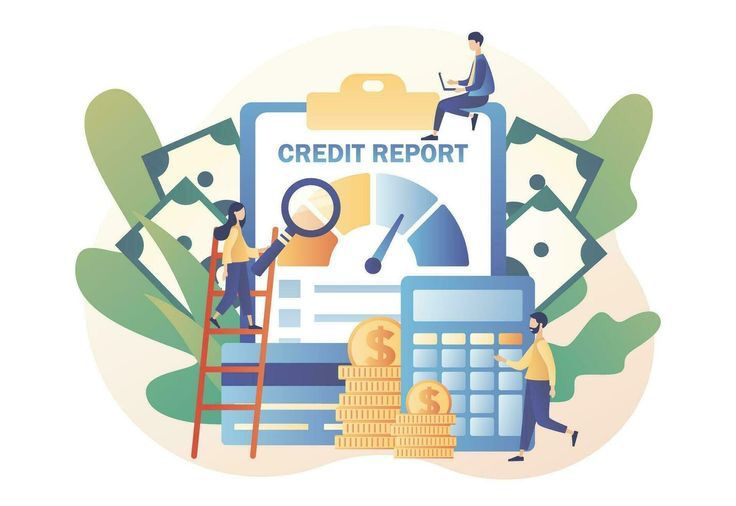

# Introduction

Credit Default Risk is the chance that companies or individuals cannot make the required payments on their debt obligations, which can lead to a possibility of loss for the lender. Earlier credit risk analysis entailed performing risk management by analyzing the borrower's credentials and capabilities, but this was prone to errors.

Promoting financial inclusion for vulnerable households and small firms have become a perennial challenge due to the high cost of information. However, recent fintech development have been able to mitigate this problem. Hence, with the aid of big data and machine learning models, analyst can perform credit risk assessment with better precision which are more faster compared to using traditional financial methods and scorecard models.

Studies have proven that combining big data and machine learning significantly improves the accuracy of loan default prediction, compared with the traditional approach, reflecting combination of information and modelling advantages. Furthermore, this approach benefits SMEs or borrowers with little to no credit history, collateral assets, and are in smaller cities, hence complementing the role of traditional banks by reaching underserved customers.

# Business Problem
Kalar is an upcoming fintech company that provides digital lending, payments and investment services. kalar is a micro-finance bank currently facing an increasing number of non-performing loans and defaults among its loan portfolio which has negatively impacted the company's profitabilty ratio. The company's current credit assessment process relies on traditional approach and credit scorecard methods which have several weaknesses and have been proven inadequate in accurately predicting the creditworthiness of loan applicants.

# Business Objective
kalar wants to improve on its risk management by providng a comprehensive evaluation of borrowers' creditworthines which includes analyzing their financial stability, credit history, loan terms, industry conditions, etc by implementing credit risk best practices such as credit risk assessment using machine learning models.


# Key Perfomance Metrics
The dataset consists of data collected from over 2,500 customers. It contains information about debtor's Age, Status, Housing, Property, Credit Risk, Credit History, Savings, Installment  Rate, Loan Amount etc.


1)   **Status**: This represents the status of the borrower's checking account with kalar.
- 1 - No checking account
- 2 - Balance less than 0 USD
- 3 - Balance less than 0 USD and 200 USD
- 4 - Balance equal to or more than 200 USD

2)   **Credit History**: It describes the history  of compliance with previous or concurrent credit contracts.
- 0 - Delay in paying off in the past
- 1 - Critical account/other credits elsewhere
- 2 - No credit taken
- 3 - Existing credits paid back duly till now
- 4 - All credits at this bank paid back duly

3) **Savings**:  It describes the borrower's savings and is a categorical ordinal variable with five values:
- 1 - Unknown/no savings account
- 2 - Savings less than 100 USD
- 3 - Savings between 100 USD and 499 USD
- 4 - Savings between 500 USD and 999 USD
- 5 - Savings equal to or more than 1000 USD

3) **Installment Rate**: It denotes credit installments as a percentage of the borrower's disposal income.
- 1 - 35% or more
- 2 - Between 25% and 35%
- 3 - Between 20% and 25%
-4 - Less than 20%

4) **Credit**: This represents the number of credits, including the current one that the borrower has (or had) at kalar.
- 1  - 1
- 2 - 2 or 3
- 3 - 4 or 5
- 4 - 6 or more

5) **Credit Risk**: This is the label for the samples and indicates whether the credit contract has been good or not.
- 0 - Bad
- 1 - Good




# Data Preparation

In [ ]:
# Loading python libaries for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Loading dataset into a dataframe
credit = pd.read_csv('/content/drive/MyDrive/kalar_data.csv')
credit.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,4,76,3,9,325,4,3,2,3,2,4,53,3,3,1,2,1,1,1,0
1,4,65,2,6,4825,2,4,3,2,4,3,82,2,3,4,1,1,2,0,0
2,2,87,1,0,3300,1,4,2,1,4,1,52,2,2,4,4,1,1,0,0
3,2,67,2,1,9575,2,3,3,3,1,4,44,1,2,2,2,2,2,1,0
4,1,96,4,3,5525,1,1,3,3,4,3,23,2,3,4,2,1,1,0,0


In [ ]:
credit.shape

(2542, 20)

In [ ]:
credit.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000
mean,2.524390,41.129426,2.131393,4.277734,3540.410307,2.704170,3.164831,2.662864,1.657356,2.613690,2.358379,40.525964,2.276947,1.883163,2.119984,2.699449,1.618804,1.454367,1.070024,0.517703
std,1.150943,28.969718,1.329014,3.269835,2848.037229,1.555675,1.338136,1.153690,0.808397,1.099648,1.083764,17.284090,0.842830,0.674579,1.111353,1.003414,0.485776,0.498011,0.826446,0.499785
min,1.000000,2.000000,0.000000,0.000000,125.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.250000,16.000000,1.000000,2.000000,1382.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,27.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,33.000000,2.000000,3.000000,2550.000000,2.000000,3.000000,3.000000,1.000000,3.000000,2.000000,36.000000,3.000000,2.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000
75%,4.000000,65.750000,3.000000,7.000000,5075.000000,4.000000,4.000000,4.000000,2.000000,4.000000,3.000000,51.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,100.000000,4.000000,10.000000,18424.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,85.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


In [ ]:
credit.isnull().sum()

,0
status,0
duration,0
credit_history,0
purpose,0
amount,0
savings,0
employment_duration,0
installment_rate,0
other_debtors,0
present_residence,0


In [ ]:
credit.nunique()

,0
status,4
duration,99
credit_history,5
purpose,11
amount,1243
savings,5
employment_duration,5
installment_rate,4
other_debtors,3
present_residence,4


In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   2542 non-null   int64
 1   duration                 2542 non-null   int64
 2   credit_history           2542 non-null   int64
 3   purpose                  2542 non-null   int64
 4   amount                   2542 non-null   int64
 5   savings                  2542 non-null   int64
 6   employment_duration      2542 non-null   int64
 7   installment_rate         2542 non-null   int64
 8   other_debtors            2542 non-null   int64
 9   present_residence        2542 non-null   int64
 10  property                 2542 non-null   int64
 11  age                      2542 non-null   int64
 12  other_installment_plans  2542 non-null   int64
 13  housing                  2542 non-null   int64
 14  number_credits           2542 non-null   int64
 15  job 

In [ ]:
# Convert Ordinal data to category datatype to improve  efficency and performance
def change_dtype (df,column):
  credit[column] = credit[column]. astype ('category')
  return credit[column]


In [ ]:
credit_category = credit.drop(['duration', 'amount','age'], axis = 1).columns
change_dtype(credit, credit_category)
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   status                   2542 non-null   category
 1   duration                 2542 non-null   int64   
 2   credit_history           2542 non-null   category
 3   purpose                  2542 non-null   category
 4   amount                   2542 non-null   int64   
 5   savings                  2542 non-null   category
 6   employment_duration      2542 non-null   category
 7   installment_rate         2542 non-null   category
 8   other_debtors            2542 non-null   category
 9   present_residence        2542 non-null   category
 10  property                 2542 non-null   category
 11  age                      2542 non-null   int64   
 12  other_installment_plans  2542 non-null   category
 13  housing                  2542 non-null   category
 14  number_c

# Exploratory Data Analysis

## Visualization of Categorical Variables

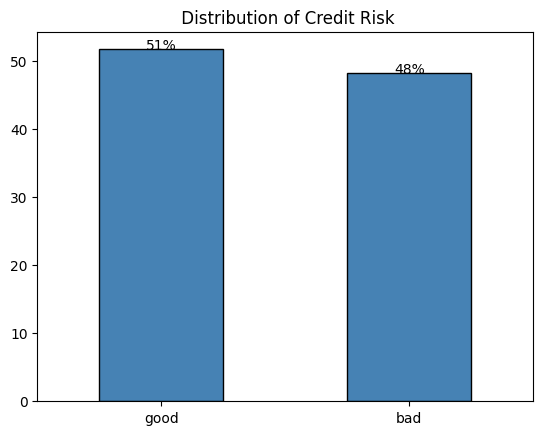

In [ ]:
# Visualize the Distribution of Credit Risk
risk = credit['credit_risk'].value_counts(normalize=True)*100
ax = risk.plot.bar( title = ' Distribution of Credit Risk', xlabel ="", ylabel = '',edgecolor = 'black', color = 'steelblue')
ax.set_xticklabels(risk.index,rotation = 0)
plt.xticks(ticks =[0,1], labels = ['good', 'bad'])
#convert x-axis values to percentage format
for y in ax.patches:
    ax.annotate (f'{int(y.get_height())}%', (y.get_x() + y.get_width()
                              / 2, y. get_height()), ha = 'center', va='baseline')


- The chart above indicates there is a distinct differences in good versus bad credit risk with about 51% of borrowers having good credit and 48% having bad credit. However, the percentage level is unfavourable with only 3% differences in the credit risk.

Distribution of Categorical Variables by Credit Risk


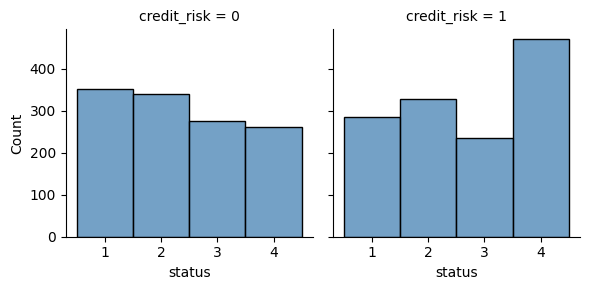

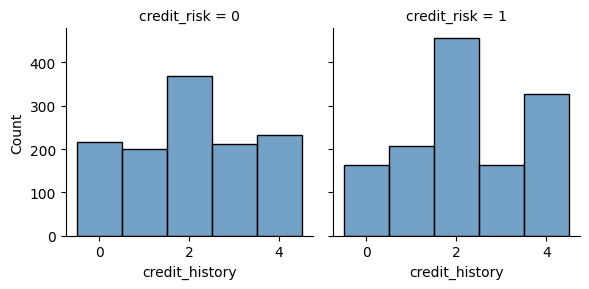

In [ ]:
print ('Distribution of Categorical Variables by Credit Risk')
column1 = ['status', 'credit_history']
for col1 in column1:
  x1 = sns.FacetGrid (credit, col ='credit_risk')
  x1 .map(sns.histplot, col1, bins =5, color = 'steelblue')
plt.tight_layout()
plt.show()

-  The top chart indicates that borrowers status 4 - balance equal to or more than 200 USD have a higher count of good credit. Generally, borrowers with good credit  have more balance in their checking account compared to the other.
- The bottom chart shows that borrowers with good credit have more credit history or concurrent credit contracts.

Distribution of Categorical Variables by Credit Risk


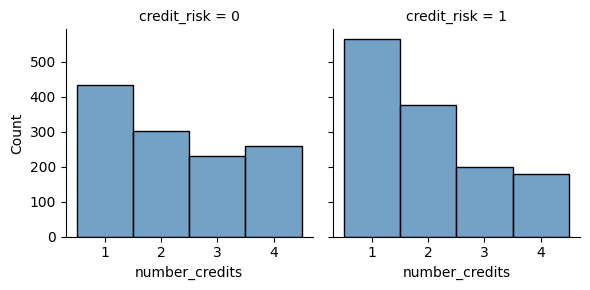

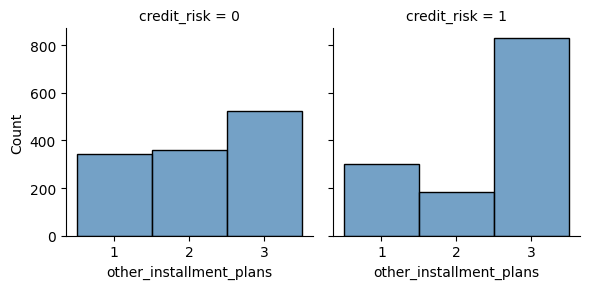

In [ ]:
print('Distribution of Categorical Variables by Credit Risk')
column2 =  ['number_credits', 'other_installment_plans']
for col2 in column2:
  x2 = sns.FacetGrid (credit, col ='credit_risk')
  x2. map(sns.histplot, col2, bins = 5, color =  'steelblue')
plt.tight_layout()
plt.show()


-  The distribution of other installment plans by credit risk  suggests that most borrowers  whom fall within 3 - none category  do not have other installment plans from providers other than kalar while other borrowers have with banks and stores.

Distribution of Categorical Variables by Credit Risk


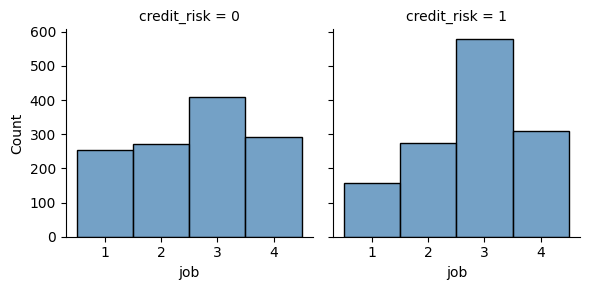

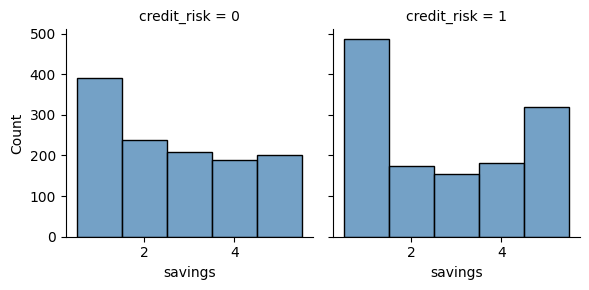

In [ ]:
print ('Distribution of Categorical Variables by Credit Risk')
column3 = ['job', 'savings']
for col3 in column3:
  x3 = sns.FacetGrid (credit, col ='credit_risk')
  x3 .map(sns.histplot, col3, bins =5, color = 'steelblue')
plt.tight_layout()
plt.show()

- The histogram indicates that most borrowers in 3 -  skilled employees category have the highest number of borrowers with good credit. There are also higher number of borrowers with bad credit who are in 1 - unemployed/ unskilled category compared to borrowers with good credit.
-  There is high number of borrowers with  1 - no saving account while  most borrowers with good credit have 5 - savings equal to or more than 1000 USD compared to those with bad credit

## Visualization of Numerical Variables

<ipython-input-5-d30e0f8ad0f9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan = credit.groupby('credit_risk')['amount'].sum()


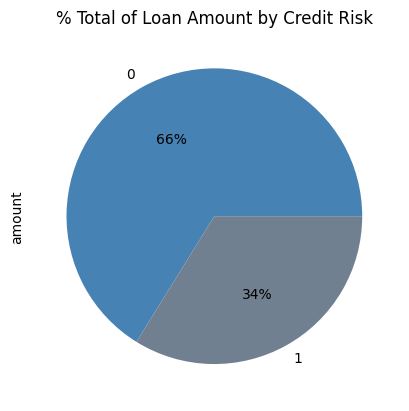

In [ ]:
# Visualize the  percentage of total loan amout provided to borrowers by credit risk
loan = credit.groupby('credit_risk')['amount'].sum()
loan.plot.pie( title = '% Total of Loan Amount by Credit Risk', autopct ='%1.0f%%', colors = [ 'steelblue', 'slategrey'])
plt.show()


- The pie chart above shows that the company has a significantly high amount of loan defaults, and non performing loans  at 66% compared to loan repayments at 34%. This has negatively impacted kalar's profitability ratio in the financial market.

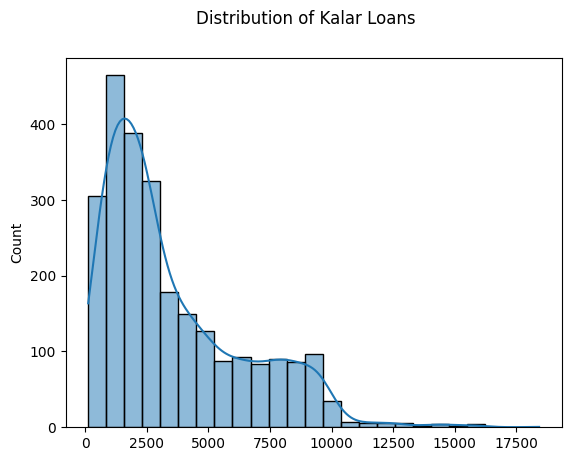

In [ ]:
# Using a histogram visualize the distribution of loan amount
sns.histplot( data = credit, x = 'amount', bins = 25, kde = True)
plt.suptitle( 'Distribution of Kalar Loans')
plt.xlabel ("")
plt.show()


- The histogram has a right tail which suggests that most loan amounts are located at the left side of the distribution with the average loan amount falling between 2500 to 3500 USD. The chart shows the average loan amount at kalar is low, with only few high loans being authorized indicating a positive skewed distribution.

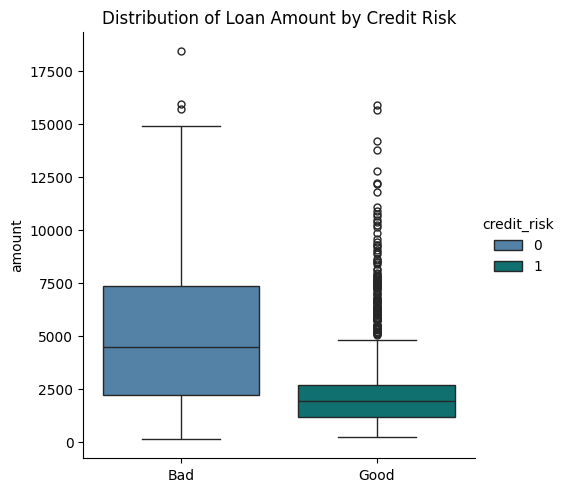

In [ ]:
# Creating a boxplot to identify outliers in the variables
color = { 0: 'steelblue', 1: 'teal'}
sns.catplot ( data = credit, x = 'credit_risk', y = 'amount', kind = 'box', palette = color,  hue = 'credit_risk')
plt.xticks( ticks = [0,1], labels = ['Bad', 'Good'])
plt.title  ('Distribution of Loan Amount by Credit Risk')
plt.xlabel ("")
plt.show()

- Borrowers with good credit have a wider range of loan amounts compared to those with bad credit . In summary, borrowers with good credit are receive higher loan amounts while those with bad credit receive lower loan amounts.

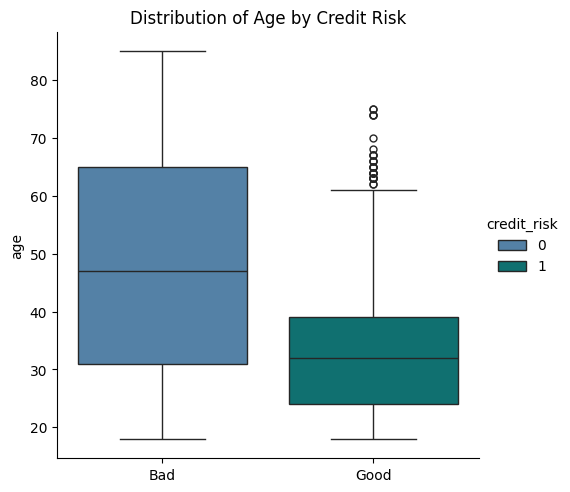

In [ ]:
color = { 0: 'steelblue', 1: 'teal'}
sns.catplot ( data = credit, x = 'credit_risk', y = 'age', kind = 'box', palette = color, hue = 'credit_risk')
plt.xticks( ticks = [0,1], labels = ['Bad', 'Good'])
plt.title('Distribution of Age by Credit Risk')
plt.xlabel ("")
plt.show()

- The outliers present in the boxplot visualization  are of natural variation and does not exceed or fall below what is expected. Hence, we skip handling outliers.

### Identify Multicollinearity present among features in the dataset

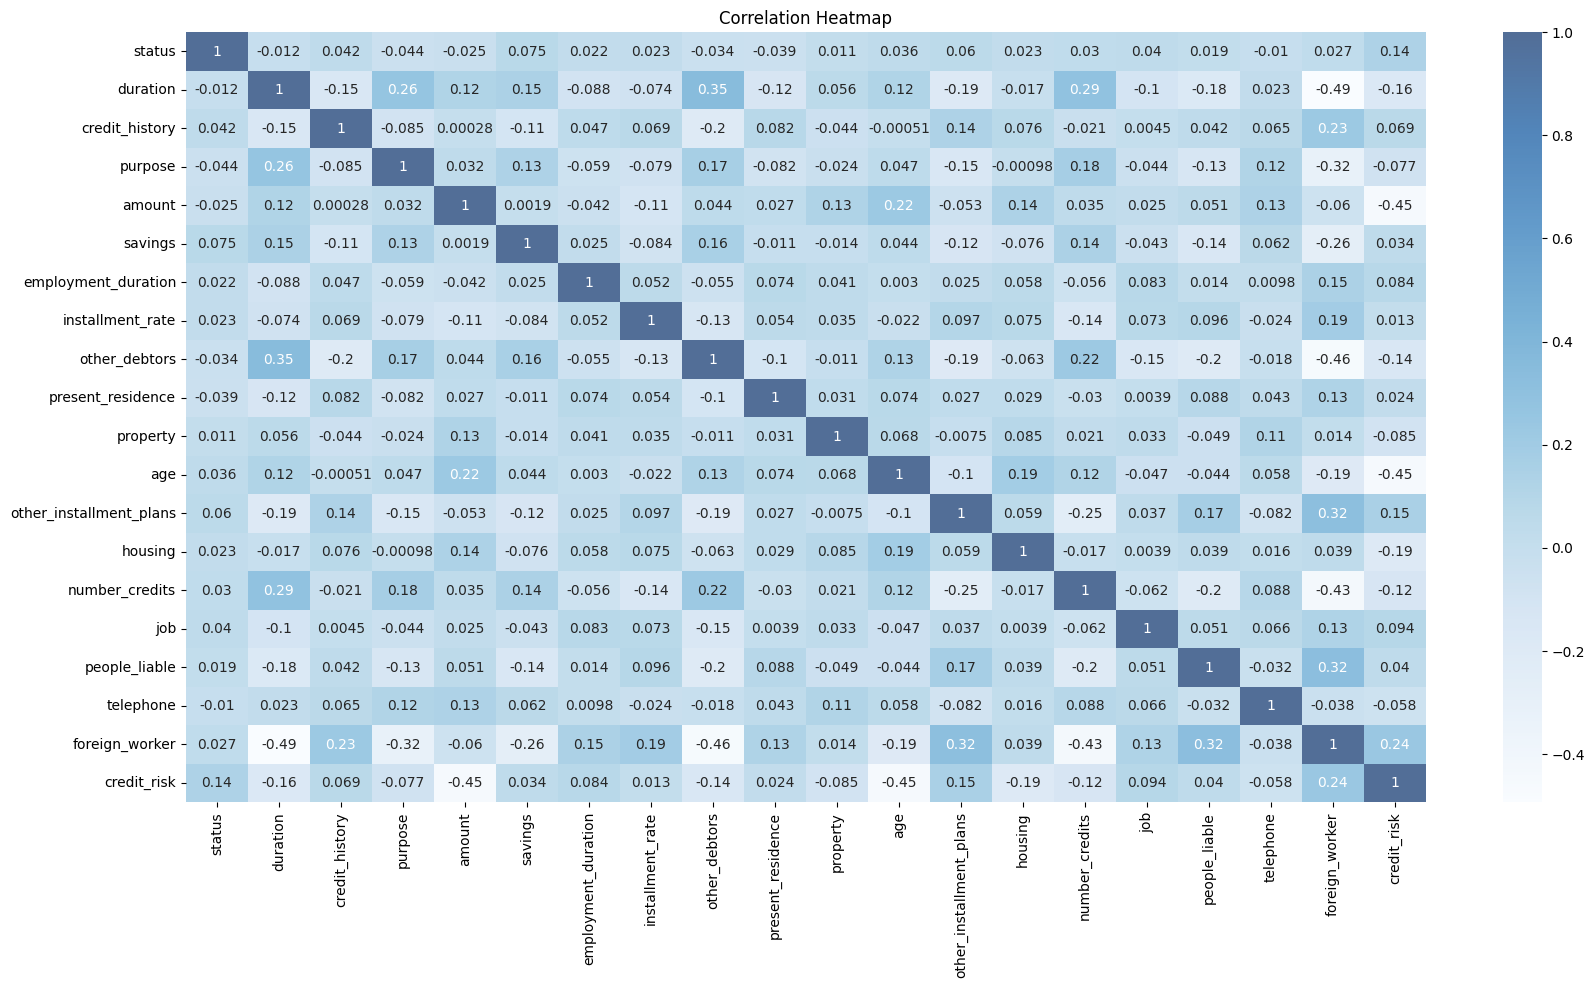

In [ ]:
# Plot all numerical variables using a heatmap
plt.figure(figsize = (20,10))
sns.heatmap( credit.corr(),  annot = True, alpha = 0.7, cmap = 'Blues')
plt.title("Correlation Heatmap")
plt.show()

- The Heatmap above suggests there's no very strong correlation between variables. Hence, no multicollinearity problem will be expected. This means the independent variables are not highly correlated with each other.

## Model Development and Prediction

In [ ]:
# Split data into feature and target variables
x = credit.drop(['credit_risk'], axis = 1)
y = credit ['credit_risk']

# Randomly partition data into Train ( 70%) and Test ( 30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1234 )
print(x_train.shape, x_test.shape)

(1779, 19) (763, 19)


In [ ]:
# Fit a logistic regression model to predict the credit risk using all other variables
x = sm.add_constant(x_train)
log_model = sm.Logit(y_train, x).fit()
print(log_model.summary())

Optimization terminated successfully.
         Current function value: 0.440097
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            credit_risk   No. Observations:                 1779
Model:                          Logit   Df Residuals:                     1759
Method:                           MLE   Df Model:                           19
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                  0.3631
Time:                        07:49:45   Log-Likelihood:                -782.93
converged:                       True   LL-Null:                       -1229.3
Covariance Type:            nonrobust   LLR p-value:                4.138e-177
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.3345      0.586      2.279      0.023       0.187   

- The summary shows how well the model fits the data. The results are relatively small in magnitude which proves that the model is a relatively good fit for the data.
-  Status has a positive coefficient of 0.3320 indicating that an  increase in amount  available in borrowers checking account is associated with an increase in the log odds of credit being good and it is statistically significant because the p-value is less that the significant level of 0.001.
-  Amount has a negative coefficient which also states that a increase in amount is associated with a decrease in the  log odds of credit being good, and it is  statistically  significant because the p-value is less than 0.001.
- Duration, Amount, Status, Purpose, Savings etc are all important predictors in determining good or bad credit .

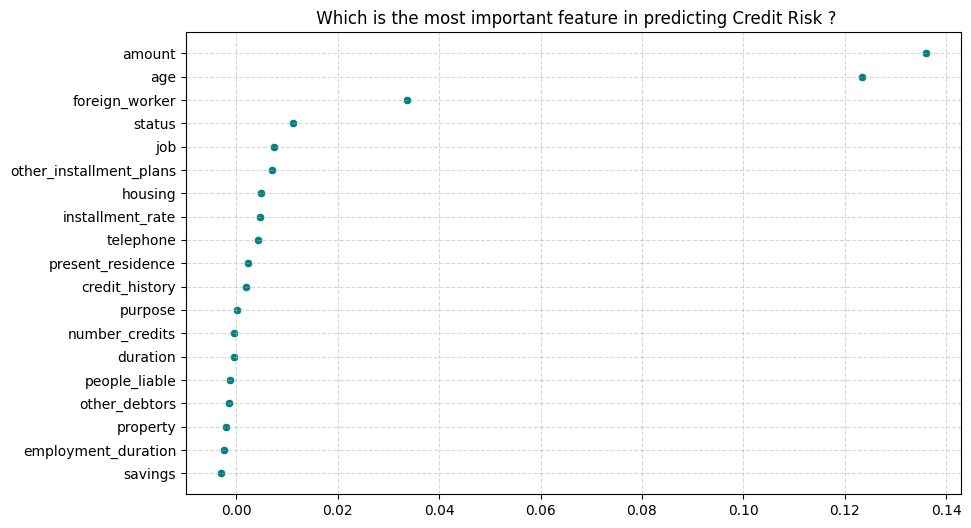

In [ ]:
# Calculate the most important features in predicting credit risk
log_model = LogisticRegression(solver = 'liblinear')
log_model.fit(x_train, y_train)
from sklearn.inspection import permutation_importance
result = permutation_importance(log_model, x_train, y_train, n_repeats = 10)
importance = result.importances_mean

# Sort feature importance in decending order
sort = importance.argsort()[::-1]
importance = importance[sort]
predictors = x_train.columns[sort]

# Visualize feature importance
plt.figure(figsize =(10,6))
sns.scatterplot(x = importance, y = predictors, color = 'teal' )
plt.title(' Which is the most important feature in predicting Credit Risk ?')
plt.ylabel ("")
plt.grid (True, alpha = 0.5, linestyle = '--')
plt.show()

- Amount and Age are top features for predicting credit risk. Other significant predictors are Foreign Workers, Status, Job etc. These variables have significant effect in predicting the likelihood of credit risk being categorized as good.  

### Generate probabilities for the train and test data using our logistic regression model

In [ ]:
# Predictions on the train data
log_model.predict(x_train)

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
# Predictions on the test data
log_model.predict(x_test)

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,

- In our model, values below 0.5 means there is less than 50% chance of credit risk being good, so we would round down which is classified as 0. Alternatively, values above 0.5 would round up which is classified as 1.

## Model Evaluation

In [ ]:
logreg = LogisticRegression(solver = 'liblinear')
# Train the model on the training data
logreg.fit(x_train, y_train)

#Predict the target variable on  test data
y_pred = logreg.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80       395
           1       0.76      0.88      0.82       368

    accuracy                           0.81       763
   macro avg       0.82      0.81      0.81       763
weighted avg       0.82      0.81      0.81       763



- Out of all the instances the model predicted as bad credit, 87% were actually bad credit risk and 74% were correctly indentified.
- Out of all the instances the model predicted 76% as good credit risk, with a recall of 88%.

In [ ]:
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(x_test, y_test)

#Predict the target variable on train data
y_pred = logreg.predict(x_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       831
           1       0.79      0.82      0.80       948

    accuracy                           0.79      1779
   macro avg       0.79      0.79      0.79      1779
weighted avg       0.79      0.79      0.79      1779



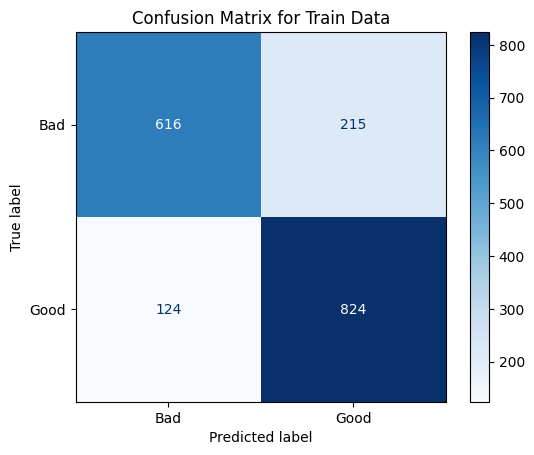

In [ ]:
# Plot confusion matrix for train data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_train = log_model.predict(x_train)
train = confusion_matrix(y_train, y_pred_train)
c1 = ConfusionMatrixDisplay(train, display_labels=['Bad', 'Good'])
c1.plot(cmap = 'Blues')
plt.title( 'Confusion Matrix for Train Data')
plt.show()

- 616 represents the number of instances when the model correctly predicted bad credit risk.
- 124 represents the number of instances incorrectly predicted as bad credit when they were actually good credit.
- 215 reprents number of instances incorrectly predicted as good credit risk when they were actually bad credit.
- 824 represents the number of instances correctly predicted as good credit.

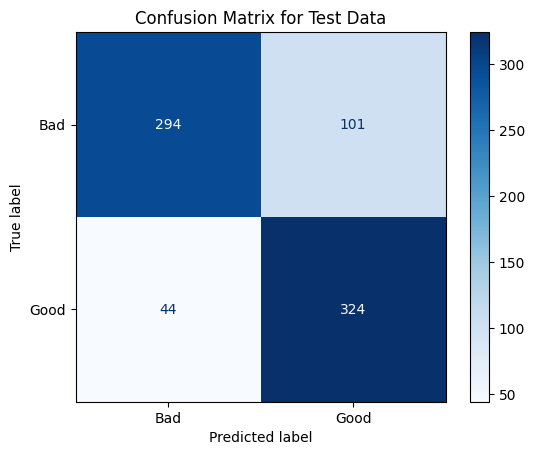

In [ ]:
# Plot confusion matrix for test data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_test = log_model.predict(x_test)
test = confusion_matrix(y_test, y_pred_test)
c2 = ConfusionMatrixDisplay(test,  display_labels=['Bad', 'Good'])
c2.plot(cmap = 'Blues')
plt.title( 'Confusion Matrix for Test Data')
plt.show()

# Conclusion


-  The objective entails building a model that will be able to detect potential credit risk defaults by implementing machine learning models using logistic regression. The model has been able to gain significant insights in strenghtening  kalar's credit risk managemet, and yeild better predicton of loan defaults.

- The model helps capture the nonlinear relationships between the target and feature variables and interactive effects among the feature variables.

- The model has achieved a reasonably good level of accuracy in predicting  credit risk.

- By combining additional data to machine learning models such as proprietary information which includes business transactions, consumption patterns, payments, customer ratings, etc contributes to the eficiency of credit risk assessment.

- Machine learning models, cloud computing, and AI will enable kalar process and restructure loan applications quickly and update risk assesment which will significantly help minimize operating costs. However, its up to the policy makers at the company to decide the best plan to follow.

- In future analytics, to achieve better precisions  we can test different methods such as decision trees  and  random forest in forecasting loan defaults.

